<a href="https://colab.research.google.com/github/MarvelousAlex/Python_Data_Analysis/blob/main/28_Matplotlib_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Intro

## Overview

### Notes
* Matplotlib is a library for creating static, interactive, and animated visualizations in Python.
* Some of the major plot types available in Matplotlib are line, bar, scatter, histogram, and pie charts, along with many others.
* It's highly customizable and can be used to create complex plots by layering elements.

### Importance

* Matplotlib is crucial for data analysis, it offers a way to visualize data and insights in a graphical format.
* It facilitates the understanding of data through visual representation, making it easier to detect patterns, trends, and outliers.
* Supports a wide range of graphs and plots including visualizations like 3D plots and interactive graphs for in-depth analysis.
* Integrates with Pandas and NumPy, easy to go from data manipulation to visualization.

### Import

* To use Matplotlib, you first need to import it, usually alongside Pyplot, which is a plotting module.
* The import convention is to import `matplotlib.pyplot` as `plt`, simplifying the reference to the module while coding.

You can view the official documentation on the charts [here](https://matplotlib.org/stable/plot_types/index.html).

## Loading Data

### Notes

* Let's load in the data from the CSV using `pd.read_csv()`.

### Example

Let's load in our file. Don't forget to load and install (only in Google Collab do you have to install every time) the `datasets` library every time you open a new session.

In [3]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

### Plotting a simple line plot

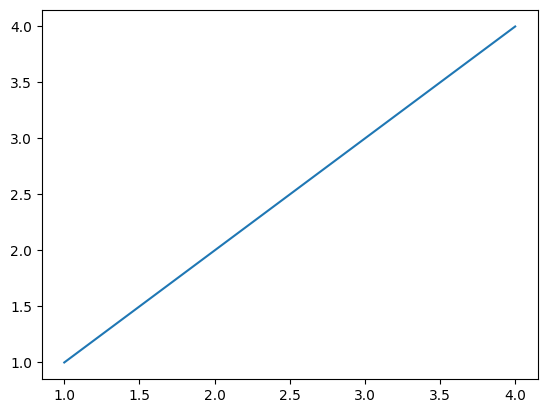

In [4]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x,y)

We can remove that:
> [<matplotlib.lines.Line2D at 0x1a035b6d0>]  

By adding `plt.show()` although it's not required in Jupyter Notebooks.

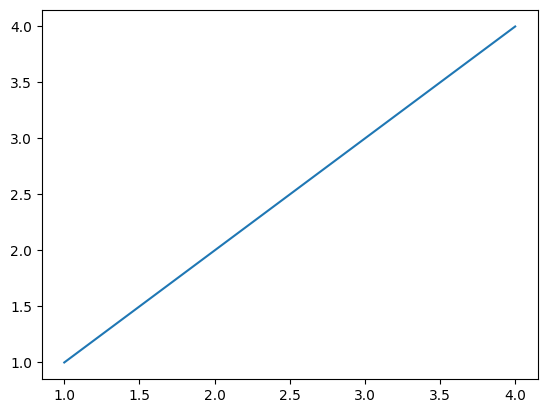

In [5]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show()